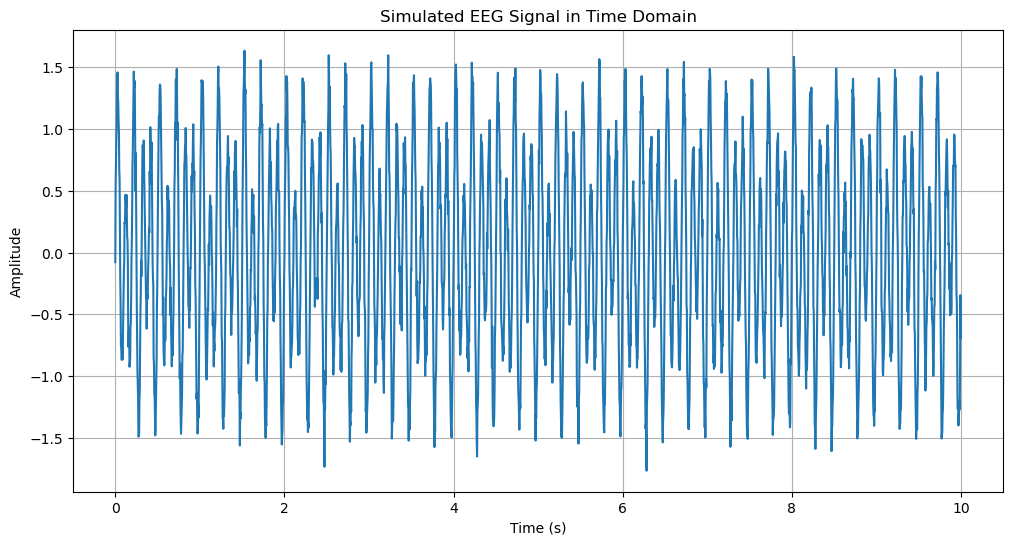

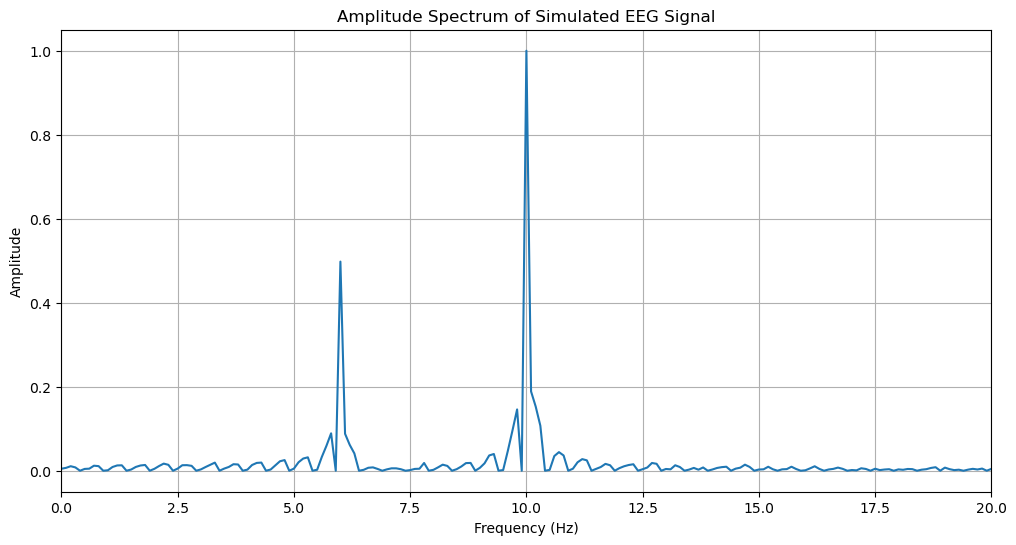

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the Fast Fourier Transform (FFT) of a complex-valued signal."""
    n = len(P)
    if n == 1:
        return P

    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)

    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]

    return y

# Setting sampling frequency and signal duration
Fs = 256  # Sampling frequency (Hz)
T = 10    # Signal duration (seconds)
N = T * Fs  # Number of samples

# Time vector
t = np.arange(N) / Fs

# Generate simulated signal containing alpha waves (8-12 Hz) and theta waves (4-8 Hz)
alpha_wave = np.sin(2 * np.pi * 10 * t)  # Alpha wave, 10 Hz
theta_wave = 0.5 * np.sin(2 * np.pi * 6 * t)  # Theta wave, 6 Hz

# Simulated EEG signal
eeg_signal = alpha_wave + theta_wave + 0.1 * np.random.randn(N)  # Add a small amount of random noise

# Plot simulated EEG signal in time domain
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_signal)
plt.title('Simulated EEG Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute FFT
# F = np.fft.fft(eeg_signal)
F = FFT(eeg_signal)

# Frequency vector
freq = np.fft.fftfreq(N, 1/Fs)

# Normalize amplitude spectrum
F_abs = np.abs(F) / N

# Plot amplitude spectrum of simulated EEG signal
plt.figure(figsize=(12, 6))
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # Multiply by 2 because we only take the positive frequency part
plt.title('Amplitude Spectrum of Simulated EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # Only show the range from 0 to 20 Hz
plt.grid(True)
plt.show()
